# Visualización de datos para la clasificación
# Explorando MNIST(modified National Institute of Standars and Technology dataset) y redes neuronales

El propósito de este documento es entender sobre redes neuronales y como varía su desempeño al utilizar diferentes optimizadores.

Antes de poder construir redes neuronales, necesitamos importar algunas cosas de Keras (datos de Internet) y preparar nuestros datos. El siguiente código extrae el conjunto de datos correspondientes a MNIST, proporcionado por Keras, y corvierte las imágenes de 28x28 píxeles en un vector con una longitud 784. Además, modifica las etiquetas de un valor numérico 0-9 a un vector one-hot encoded.

One-hot encoding hace referencia a un grupo de bits entre los cuales las combinaciones validas de valores son solo aquellas con un solo bit alto (1) y todas las demás bajas (0). Mirar la gráfica siguiente:
<center><img src="https://i.imgur.com/wKtY1Og.png" alt="drawing" width="400"/>

# Importación de Datos

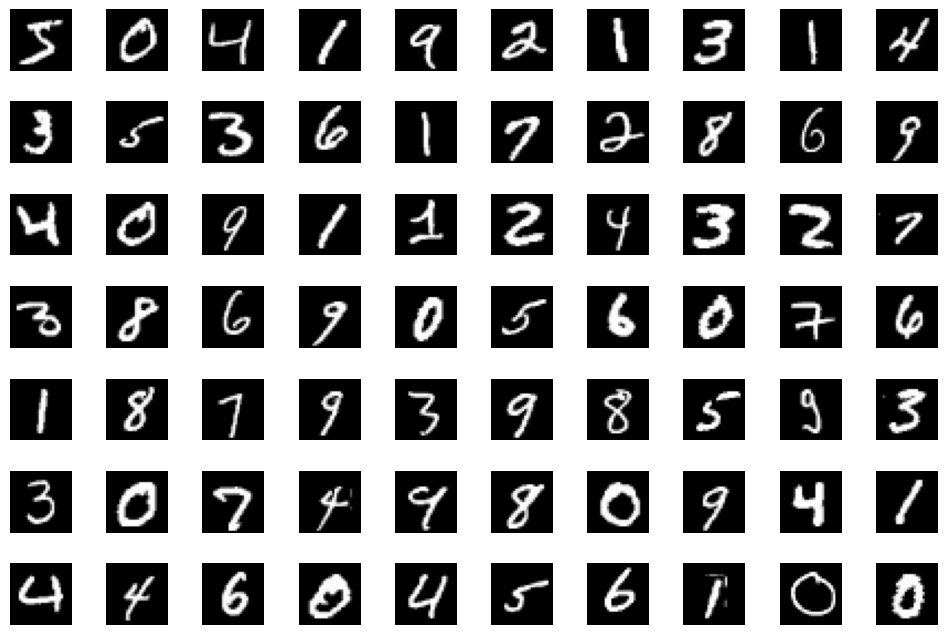

In [5]:
import matplotlib.pyplot as plt
import tensorflow as tf
import ssl

# Desactivar la verificación SSL
ssl._create_default_https_context = ssl._create_unverified_context

# Ahora intenta cargar el dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Load only the images (X_show) from the MNIST dataset
(X_show, _), _ = tf.keras.datasets.mnist.load_data()

# Plot a 10x7 grid of digit images
fig, axes = plt.subplots(7, 10, figsize=(12, 8))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for i, ax in enumerate(axes.flat):
    ax.imshow(X_show[i], cmap='gray')  # Display image in grayscale
    ax.axis('off')  # Hide axis
    # Removed the label display since y_train is not used
    # If you'd like to show indices instead, you can uncomment the next line:
    # ax.set_title(f'#{i}', fontsize=12)

plt.show()

# Comparación de Optimizadores. Gráficas de Epochs vs. Loss/Accuracy (ACTIVIDAD BASE)

Training with Gradient Descent (GD)...


/Users/slincastro/Projects/Master_IA/Matematica_Aplicada/tf-env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training with Stochastic GD (SGD)...
Training with Mini-Batch GD...
Training with Momentum GD...
Training with Adam...


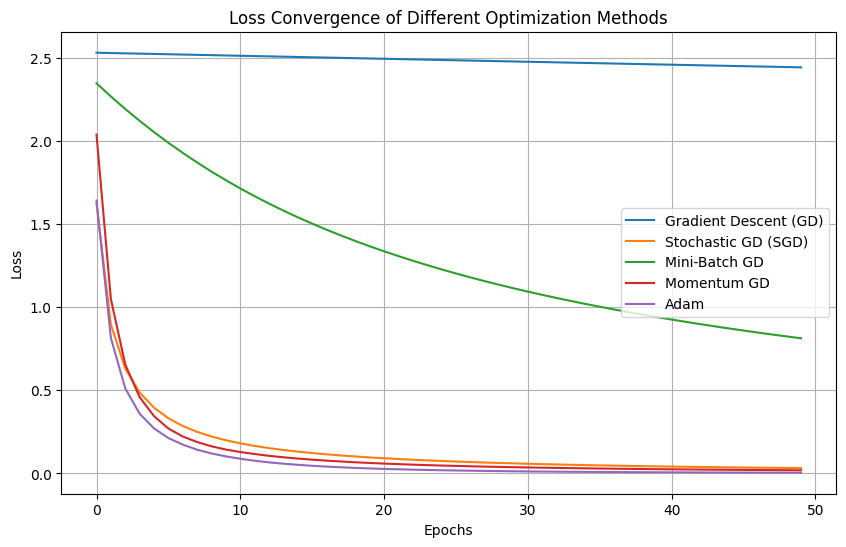

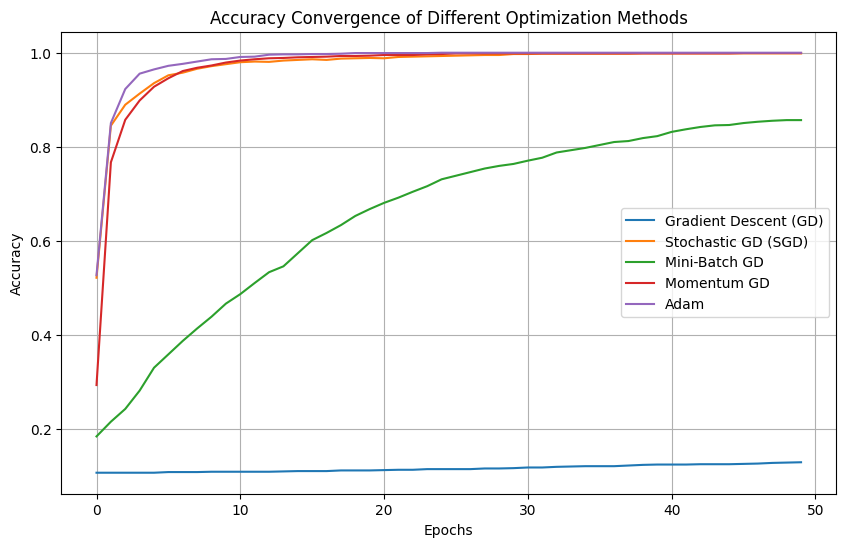

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import tensorflow as tf

  # ---- Load and Preprocess Data ----
digits = load_digits()   # formato original-> (1797, 8, 8)
X = digits.images.reshape(len(digits.images), -1)  # Flatten images to 64 features, i.e., (1797, 64) ->  1797 samples con 64 features
y = digits.target.reshape(-1, 1)  # Labels, Convierte el vector de etiquetas de (1797,) a una matriz columna (1797, 1).

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)  # se usa zscore para normalizar los datos de entrada

# One-hot encode labels
encoder = OneHotEncoder(sparse_output=False)  #False, formato de matriz densa tal como muestra la figura al comienzo del script

y = encoder.fit_transform(y)  # generamos las clases e.g.,   Clase 3 [0,0,0,1]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---- Define Neural Network Model ----
def build_model(activation="tanh"):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation=activation, input_shape=(64,)),  # Input Layer  (64 porque esas son el numero de features)
        tf.keras.layers.Dense(32, activation=activation),  # Hidden Layer
        tf.keras.layers.Dense(10, activation="softmax")  # Output Layer (una por cada clase de dígito: 0-9, total 10 clases).
    ])
    return model

# ---- Set Learning Rate and Hyperparameters ----
learning_rate = 0.001  #
momentum_beta1 = 0.98  #
adam_beta1 = 0.9  #
adam_beta2 = 0.999  #

# ---- Define Optimizers with Modifiable beta1 and beta2 ----   AQUI VER COMO SE USA CADA DIFERENTE OPTIMIZADOR PARA LAS ACTIVIDADES POSTERIORES
optimizers = {
    "Gradient Descent (GD)": tf.keras.optimizers.SGD(learning_rate=learning_rate),
    "Stochastic GD (SGD)": tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.0),
    "Mini-Batch GD": tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.0),
    "Momentum GD": tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=momentum_beta1),
    "Adam": tf.keras.optimizers.Adam(learning_rate=learning_rate, beta_1=adam_beta1, beta_2=adam_beta2)
}

# Definir los batch sizes para cada optimizador
batch_sizes = {
    "Gradient Descent (GD)": X_train.shape[0],  # Usa TODAS las muestras por iteración (GD)
    "Stochastic GD (SGD)": 1,  # Usa 1 muestra por iteración
    "Mini-Batch GD": 32,  # Usa Mini-Batches de 32 muestras
    "Momentum GD": 32,  # Igual que Mini-Batch, pero con memoria del gradiente
    "Adam": 32  # Adam generalmente usa Mini-Batch
}

# ---- Train Model with Each Optimizer ----
history_loss = {}
history_acc = {}

for name, optimizer in optimizers.items():
    print(f"Training with {name}...")
    model = build_model(activation="tanh")  # MODIFY ACTIVATION FUNCTION!
    model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])
    history = model.fit(X_train, y_train, epochs=50, batch_size=batch_sizes[name], verbose=0, validation_data=(X_test, y_test))

    history_loss[name] = history.history["loss"]
    history_acc[name] = history.history["accuracy"]

# ---- Plot Loss Convergence ----
plt.figure(figsize=(10, 6))
for name, loss in history_loss.items():
    plt.plot(loss, label=name)

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Convergence of Different Optimization Methods")
plt.legend()
plt.grid()
plt.show()

# ---- Plot Accuracy Convergence ----
plt.figure(figsize=(10, 6))                                               #1 Base
for name, acc in history_acc.items():                                     #2 Base
    plt.plot(acc, label=name)                                             #3 Base

plt.xlabel("Epochs")                                                      #4 Base
plt.ylabel("Accuracy")                                                    #5 Base
plt.title("Accuracy Convergence of Different Optimization Methods")       #6 Base
plt.legend()                                                              #7 Base
plt.grid()                                                                #8 Base
plt.show()                                                                #9 Base


# Actividades

1. Modificar la Tasa de Aprendizaje (learning rate)

Prueba valores con 0.001, 0.05, 0.1 en los optimizadores Adam y en el Momentum GD: Graficar Epochs vs. Loss
Add blockquote

¿Cómo afecta una tasa de aprendizaje alta a la convergencia en cada enfoque ?

Una tasa de aprendizaje alta hace que ambos optimizadores, Adam y Momentum, se vuelvan inestables. En Adam, con un valor de 0.1, la pérdida no logra disminuir y presenta muchas oscilaciones, lo que significa que el modelo no puede aprender correctamente. En Momentum, también se ve que con 0.1 la pérdida baja al inicio, pero luego empieza a subir y bajar sin control, mostrando que el modelo no logra llegar a una solución estable.

¿Qué sucede si la tasa de aprendizaje es demasiado baja en cada enfoque?
Cuando la tasa de aprendizaje es muy baja (0.001), tanto Adam como Momentum logran reducir la pérdida de manera estable, pero muy lentamente. En Adam, la pérdida baja de forma constante y segura, aunque puede necesitar más tiempo para llegar a un valor óptimo. En Momentum, también hay estabilidad, pero la velocidad de aprendizaje es mucho menor, por lo que el modelo aprende más despacio.

¿Cuál/cuales tasa/s de aprendizaje ofrece un mejor desempeño en cada enfoque?
En Adam, la tasa de 0.001 es la que mejor funciona, ya que aunque avanza lento, es muy estable y logra una pérdida muy baja al final. En Momentum, la tasa que da mejor resultado es 0.05, porque permite una convergencia rápida y sin inestabilidad. Las tasas más altas (0.1) fueron demasiado agresivas y causaron problemas en ambos métodos.


Training with Adam, learning rate = 0.001


/Users/slincastro/Projects/Master_IA/Matematica_Aplicada/tf-env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training with SGD + Momentum, learning rate = 0.001

Training with Adam, learning rate = 0.05
Training with SGD + Momentum, learning rate = 0.05

Training with Adam, learning rate = 0.1
Training with SGD + Momentum, learning rate = 0.1


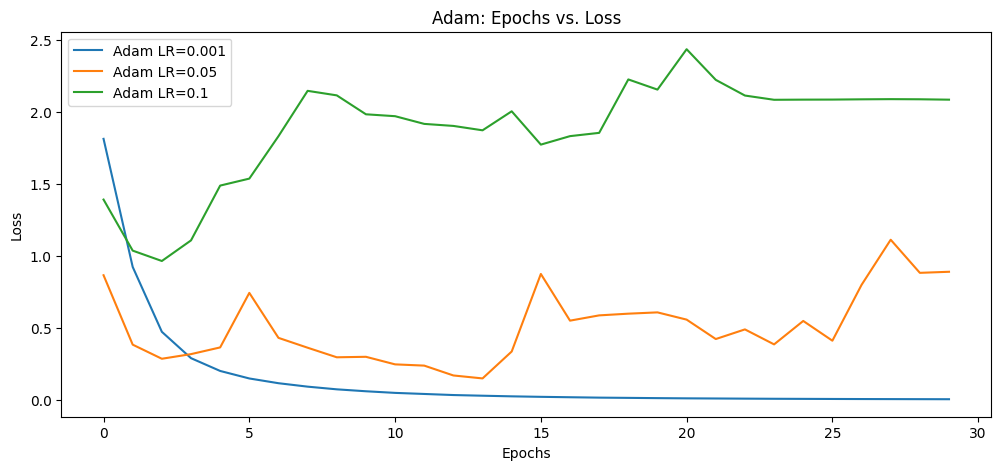

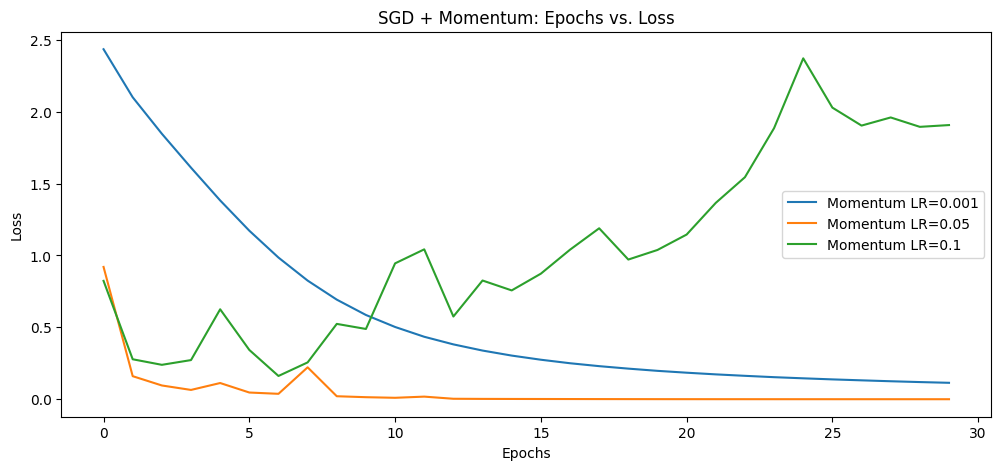

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import tensorflow as tf

# ---- Load and Preprocess Data ----
digits = load_digits()
X = digits.images.reshape(len(digits.images), -1)  # Flatten images to 64 features
y = digits.target.reshape(-1, 1)  # Labels

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# One-hot encode labels
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---- Define Neural Network Model ----
def build_model(activation="relu"):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation=activation, input_shape=(64,)),
        tf.keras.layers.Dense(32, activation=activation),
        tf.keras.layers.Dense(10, activation="softmax")  # Output layer for 10 classes
    ])
    return model

# ---- Set Learning Rates ----
learning_rates = [0.001, 0.05, 0.1]  # Vector of learning rates
momentum_beta = 0.9
batch_size = 32
epochs = 30  # You can adjust this number for longer training

# ---- Store Histories ----
history_loss_adam = {}
history_loss_momentum = {}

# ---- Train Models for Each Learning Rate ----
for lr in learning_rates:
    # --- Adam ---
    print(f"\nTraining with Adam, learning rate = {lr}")
    model_adam = build_model()
    optimizer_adam = tf.keras.optimizers.Adam(learning_rate=lr, beta_1=0.9, beta_2=0.999)
    model_adam.compile(optimizer=optimizer_adam, loss='categorical_crossentropy', metrics=['accuracy'])
    history_adam = model_adam.fit(X_train, y_train, validation_data=(X_test, y_test), 
                                  batch_size=batch_size, epochs=epochs, verbose=0)
    history_loss_adam[lr] = history_adam.history['loss']
    
    # --- SGD with Momentum ---
    print(f"Training with SGD + Momentum, learning rate = {lr}")
    model_momentum = build_model()
    optimizer_momentum = tf.keras.optimizers.SGD(learning_rate=lr, momentum=momentum_beta)
    model_momentum.compile(optimizer=optimizer_momentum, loss='categorical_crossentropy', metrics=['accuracy'])
    history_momentum = model_momentum.fit(X_train, y_train, validation_data=(X_test, y_test),
                                          batch_size=batch_size, epochs=epochs, verbose=0)
    history_loss_momentum[lr] = history_momentum.history['loss']

# ---- Plot Loss Convergence for Adam ----
plt.figure(figsize=(12, 5))
for lr in learning_rates:
    plt.plot(history_loss_adam[lr], label=f"Adam LR={lr}")
plt.title("Adam: Epochs vs. Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# ---- Plot Loss Convergence for Momentum SGD ----
plt.figure(figsize=(12, 5))
for lr in learning_rates:
    plt.plot(history_loss_momentum[lr], label=f"Momentum LR={lr}")
plt.title("SGD + Momentum: Epochs vs. Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


### 2. Experimentar con el Tamaño del Mini-Batch (batch_size) en el optimizador Adam: Graficar Epochs vs. Loss
Prueba el batch_size con 16, 64, 128
¿Qué ocurre con la estabilidad (se refiere al ruido) del entrenamiento al usar batches más pequeños?
Cuando usamos batches pequeños, como 16, el entrenamiento muestra más variaciones (ruido) entre epochs, ya que el modelo actualiza los pesos con menos datos en cada paso. Esto hace que la pérdida baje rápido pero de forma menos estable. Por otro lado, al usar batches grandes, como 128, el entrenamiento es mucho más estable y suave, pero avanza más lento al inicio. Por lo tanto, los batches pequeños generan más ruido y los grandes más estabilidad.

¿Qué tamaño de batch produce la mejor precisión en el conjunto de prueba?
El batch de tamaño 16 alcanza la mejor precisión en el conjunto de prueba, logrando cerca del 99% de exactitud. Esto ocurre porque, aunque es más ruidoso, el modelo aprende más rápido y generaliza mejor en este caso. Sin embargo, el batch de 64 también obtiene buenos resultados con menor ruido, y el de 128, aunque más estable, tarda más en alcanzar niveles altos de precisión.

Training with batch size = 16...


/Users/slincastro/Projects/Master_IA/Matematica_Aplicada/tf-env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training with batch size = 64...
Training with batch size = 128...


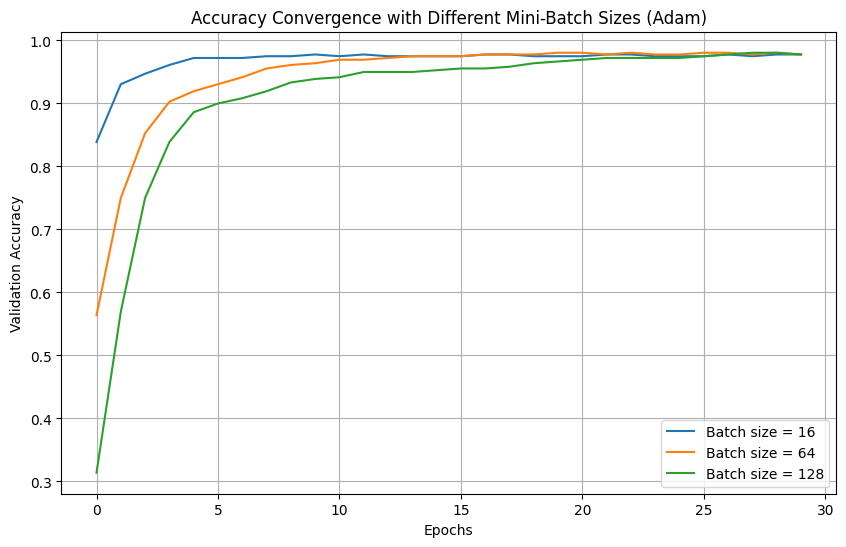

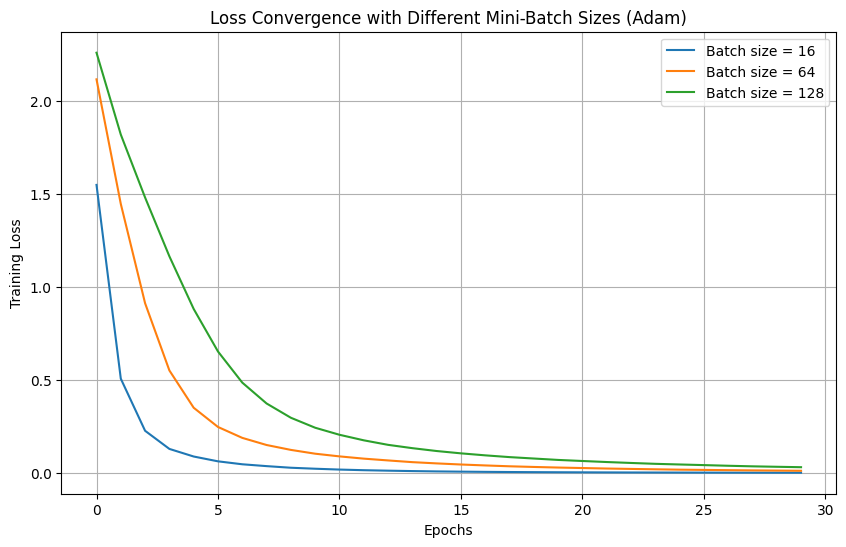

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import tensorflow as tf

# ---- Load and Preprocess Data ----
digits = load_digits()
X = digits.images.reshape(len(digits.images), -1)  # Flatten images to 64 features
y = digits.target.reshape(-1, 1)  # Labels

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# One-hot encode labels
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---- Define Neural Network Model ----
def build_model(activation="relu"):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation=activation, input_shape=(64,)),  # Input Layer
        tf.keras.layers.Dense(32, activation=activation),  # Hidden Layer
        tf.keras.layers.Dense(10, activation="softmax")  # Output Layer (10 classes)
    ])
    return model

# ---- Set Learning Rate and Batch Sizes ----
lr = 0.001  # learning rate
batch_sizes = [16, 64, 128]  # Vector of mini-batch sizes
epochs = 30  # Number of epochs

# ---- Store History ----
history_loss_adam = {}
history_acc_adam = {}

# ---- Train Model with Each Batch Size ----
for bs in batch_sizes:
    print(f"Training with batch size = {bs}...")
    model = build_model()
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr, beta_1=0.9, beta_2=0.999)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                        batch_size=bs, epochs=epochs, verbose=0)
    history_loss_adam[bs] = history.history['loss']
    history_acc_adam[bs] = history.history['val_accuracy']

# ---- Plot Accuracy Convergence ----
plt.figure(figsize=(10, 6))
for bs, acc in history_acc_adam.items():
    plt.plot(acc, label=f"Batch size = {bs}")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.title("Accuracy Convergence with Different Mini-Batch Sizes (Adam)")
plt.legend()
plt.grid()
plt.show()

# ---- Plot Loss Convergence ----
plt.figure(figsize=(10, 6))
for bs, loss in history_loss_adam.items():
    plt.plot(loss, label=f"Batch size = {bs}")
plt.xlabel("Epochs")
plt.ylabel("Training Loss")
plt.title("Loss Convergence with Different Mini-Batch Sizes (Adam)")
plt.legend()
plt.grid()
plt.show()


3. Comparar el Impacto del Momentum en SGD: Graficar Epochs vs. Accuracy
Prueba Momentums con valores de 0.4, 0.75, 0.99
¿Cómo afecta un momentum alto la el accuracy?
Un momentum alto (0.99) afecta negativamente al accuracy, ya que provoca que el modelo se vuelva inestable y no aprenda correctamente. En la gráfica se ve que al inicio parece aprender, pero rápidamente el accuracy cae y no se recupera, quedándose en valores muy bajos durante todo el entrenamiento. Esto ocurre porque un momentum tan alto genera actualizaciones demasiado grandes.

Training with Momentum = 0.4...


/Users/slincastro/Projects/Master_IA/Matematica_Aplicada/tf-env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training with Momentum = 0.75...
Training with Momentum = 0.99...


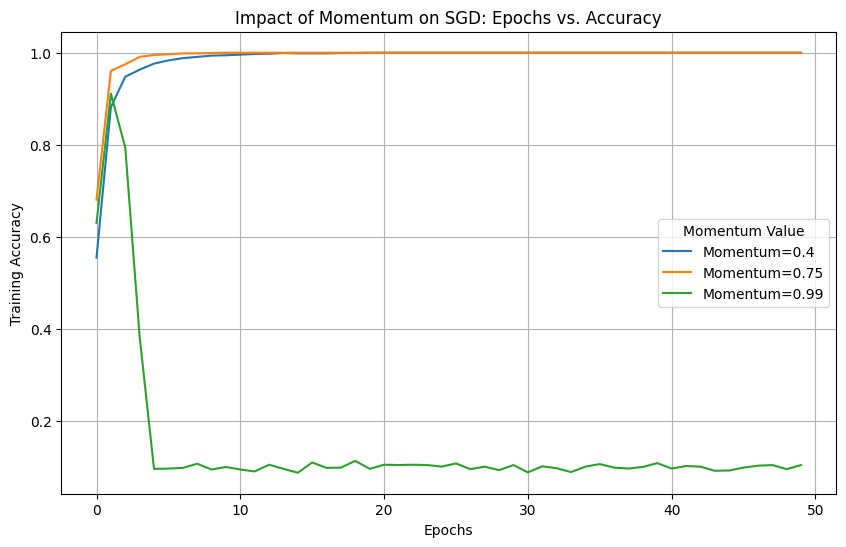

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import tensorflow as tf

# ---- Load and Preprocess Data ----
digits = load_digits()
X = digits.images.reshape(len(digits.images), -1)  # Flatten images to 64 features
y = digits.target.reshape(-1, 1)  # Labels

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# One-hot encode labels
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---- Define Neural Network Model ----
def build_model(activation="relu"):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation=activation, input_shape=(64,)),  # Input Layer
        tf.keras.layers.Dense(32, activation=activation),  # Hidden Layer
        tf.keras.layers.Dense(10, activation="softmax")  # Output Layer (10 classes)
    ])
    return model

# ---- Set Learning Rate, Batch Size, and Momentum Values ----
lr = 0.1  # learning rate
batch_size = 64  # mini-batch
momentum_beta1 = [0.4, 0.75, 0.99]  # Different momentum values to test

# ---- Train Model with Each Momentum ----
history_acc_Mom = {}  # Dictionary to store training accuracy for each momentum

for mom in momentum_beta1:
    print(f"Training with Momentum = {mom}...")
    optimizer_Momentum = tf.keras.optimizers.SGD(learning_rate=lr, momentum=mom)
    model_Mom = build_model(activation="relu")
    model_Mom.compile(optimizer=optimizer_Momentum, loss="categorical_crossentropy", metrics=["accuracy"])
    
    # Training the model
    history_Mom = model_Mom.fit(X_train, y_train, 
                                epochs=50, 
                                batch_size=batch_size, 
                                verbose=0, 
                                validation_data=(X_test, y_test))
    
    # Save accuracy history
    history_acc_Mom[f"Momentum={mom}"] = history_Mom.history["accuracy"]

# ---- Plot Accuracy Convergence ----
plt.figure(figsize=(10, 6))
for mom, acc in history_acc_Mom.items():
    plt.plot(acc, label=mom)

plt.xlabel("Epochs")
plt.ylabel("Training Accuracy")
plt.title("Impact of Momentum on SGD: Epochs vs. Accuracy")
plt.legend(title="Momentum Value")
plt.grid(True)
plt.show()


4. Cambiar la Función de Activación en las capas ocultas del optimizador Adam: Graficar Epochs vs. Accuracy
Prueba con relu, sigmoid, tanh
¿Qué función de activación produce mejores resultados de accuracy en la precisión final?
De acuerdo con las gráficas, la función de activación ReLU ofrece los mejores resultados de precisión final, ya que permite al modelo aprender más rápido y alcanzar valores más altos de accuracy. La función sigmoid, aunque logra cierta precisión, tiende a aprender más lento y puede quedarse atrapada en valores bajos por el problema de gradientes pequeños. Por otro lado, tanh muestra un comportamiento mejor que sigmoid, pero no tan bueno como ReLU. Por tanto, ReLU es la mejor opción en este caso para alcanzar la mayor precisión.

Training with Activation = relu...


/Users/slincastro/Projects/Master_IA/Matematica_Aplicada/tf-env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training with Activation = sigmoid...
Training with Activation = tanh...


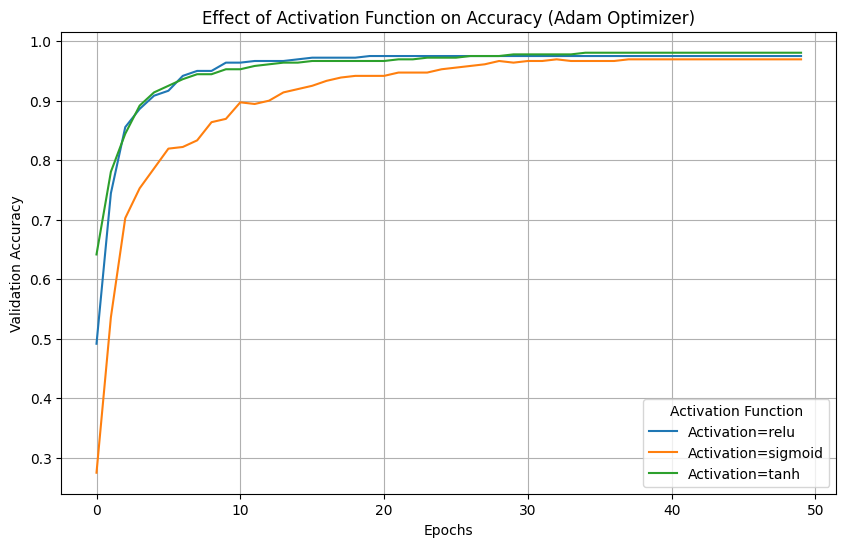

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import tensorflow as tf

# ---- Load and Preprocess Data ----
digits = load_digits()
X = digits.images.reshape(len(digits.images), -1)  # Flatten images to 64 features
y = digits.target.reshape(-1, 1)  # Labels

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# One-hot encode labels
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---- Define Neural Network Model ----
def build_model(activation="relu"):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation=activation, input_shape=(64,)),
        tf.keras.layers.Dense(32, activation=activation),
        tf.keras.layers.Dense(10, activation="softmax")  # Output Layer (10 classes)
    ])
    return model

# ---- Set Parameters ----
lr = 0.001  # learning rate
batch_size = 64  # mini-batch
activaciones = ["relu", "sigmoid", "tanh"]  # Funciones de activación a probar
epochs = 50

# ---- Train Model with Each Activation ----
history_acc_Adam = {}  # Almacenar precisión para cada activación

for ac in activaciones:
    print(f"Training with Activation = {ac}...")
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr, beta_1=0.9, beta_2=0.999)
    model_Adam = build_model(activation=ac)
    model_Adam.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])
    
    # Entrenamiento
    history_Adam = model_Adam.fit(X_train, y_train, 
                                  epochs=epochs, 
                                  batch_size=batch_size, 
                                  verbose=0, 
                                  validation_data=(X_test, y_test))
    
    # Guardar historia de accuracy
    history_acc_Adam[f"Activation={ac}"] = history_Adam.history["val_accuracy"]

# ---- Plot Accuracy Convergence ----
plt.figure(figsize=(10, 6))
for ac, acc in history_acc_Adam.items():
    plt.plot(acc, label=ac)

plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.title("Effect of Activation Function on Accuracy (Adam Optimizer)")
plt.legend(title="Activation Function")
plt.grid(True)
plt.show()


In [2]:
#!pip install matplotlib
#!pip install tensorflow
#!pip install scikit-learn
#!pip install numpy==1.24.4
#!pip uninstall -y numpy
#!pip install numpy==1.26.4
#!pip install tensorflow==2.19.0 numpy==1.26.4


  Obtaining dependency information for numpy==1.26.4 from https://files.pythonhosted.org/packages/1a/2e/151484f49fd03944c4a3ad9c418ed193cfd02724e138ac8a9505d056c582/numpy-1.26.4-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Using cached numpy-1.26.4-cp311-cp311-macosx_11_0_arm64.whl.metadata (114 kB)
Using cached numpy-1.26.4-cp311-cp311-macosx_11_0_arm64.whl (14.0 MB)

[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
